## Part A• 
## DOMAIN: Electronics and Telecommunication
## • CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting ## informative signals. 
## Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various 
## parameters. 
## • DATA DESCRIPTION: The data set contains information on various signal tests performed:
## 1. Parameters: Various measurable signal parameters.
## 2. Signal_Quality: Final signal strength or quality
## • PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality

In [ ]:
###1. Data import and Understanding [10 Marks

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('PartA_Signal.csv')

data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## B. Check for missing values and print percentage for each attribute. 

In [3]:

data.isnull().sum()*100/len(data)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [4]:
# Check if any column has null values remaining
data.columns[data.isna().any()].tolist()

[]

In [5]:

from fast_ml import eda

eda.df_info(data)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Parameter 1,float64,Numerical,96,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...",0,0.0
Parameter 2,float64,Numerical,143,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...",0,0.0
Parameter 3,float64,Numerical,80,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...",0,0.0
Parameter 4,float64,Numerical,91,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...",0,0.0
Parameter 5,float64,Numerical,153,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...",0,0.0
Parameter 6,float64,Numerical,60,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...",0,0.0
Parameter 7,float64,Numerical,144,"[34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....",0,0.0
Parameter 8,float64,Numerical,436,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...",0,0.0
Parameter 9,float64,Numerical,89,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...",0,0.0
Parameter 10,float64,Numerical,96,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...",0,0.0


No missing values found in any column of data.

## C. Check for presence of duplicate records in the dataset and impute with appropriate method. 

In [6]:

data[data.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [7]:
# dropping duplicate values
data.drop_duplicates(keep=False,inplace=True)
data[data.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 1 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1139 non-null   float64
 1   Parameter 2      1139 non-null   float64
 2   Parameter 3      1139 non-null   float64
 3   Parameter 4      1139 non-null   float64
 4   Parameter 5      1139 non-null   float64
 5   Parameter 6      1139 non-null   float64
 6   Parameter 7      1139 non-null   float64
 7   Parameter 8      1139 non-null   float64
 8   Parameter 9      1139 non-null   float64
 9   Parameter 10     1139 non-null   float64
 10  Parameter 11     1139 non-null   float64
 11  Signal_Strength  1139 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 115.7 KB


## D. Visualise distribution of the target variable.

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


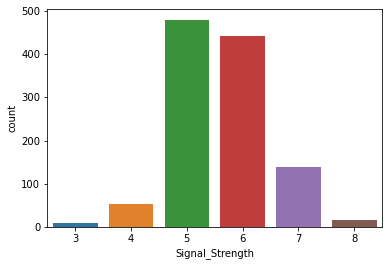

In [9]:
# Signal Strength is the target variable
sns.countplot(data['Signal_Strength']);

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


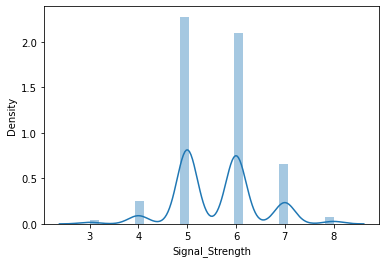

In [10]:
sns.distplot(data['Signal_Strength']);

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


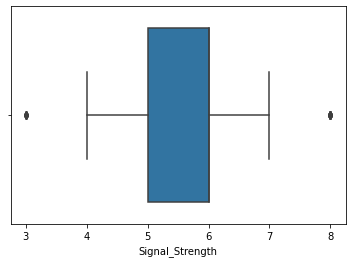

In [11]:
sns.boxplot(data['Signal_Strength']);

## E. Share insights from the initial data analysis (at least 2).

In [1]:
# Need to do


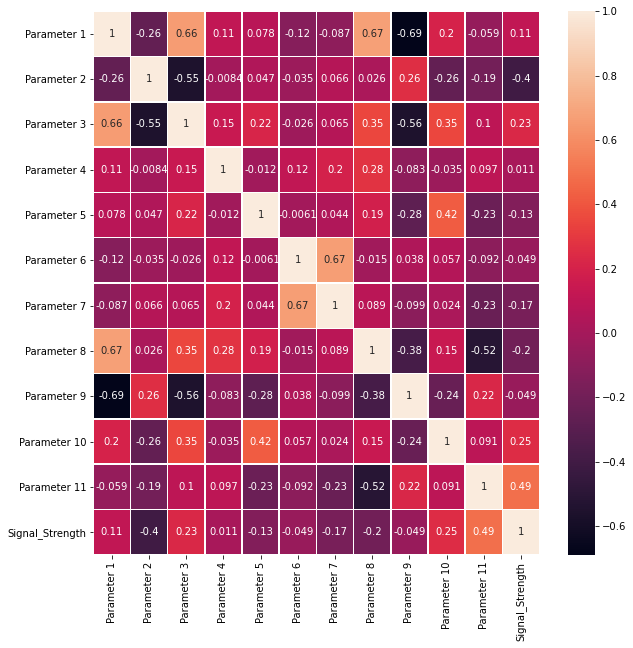

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax);

* Parameter 1 and 9 are highly correlated (negatively).
* Most of the equipments have a signal strength of 5 or 6.

# 2. Data preprocessing

## A. Split the data into X & Y. 

In [14]:
# Let independent variables be all the parameters
X = data.drop(columns='Signal_Strength', axis=1)
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4


In [15]:
# The target variable is Signal_Strength
y = data['Signal_Strength']
y

1       5
2       5
3       6
5       5
6       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: Signal_Strength, Length: 1139, dtype: int64

## B. Split the data into train & test with 70:30 proportion.

In [16]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
525,10.4,0.64,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9
1004,8.2,0.43,0.29,1.6,0.081,27.0,45.0,0.99603,3.25,0.54,10.3
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0
1317,9.9,0.44,0.46,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9
894,7.2,0.63,0.03,2.2,0.080,17.0,88.0,0.99745,3.53,0.58,9.8


## C. Print shape of all the 4 variables and verify if train and test data is in sync. 

In [17]:
print('Shape of Train Data of Independent Variables:',X_train.shape)
print('Shape of Train Data of Target Variables:',y_train.shape)
print('Shape of Test Data of Independent Variables:',X_test.shape)
print('Shape of Test Data of Target Variables:',y_test.shape)

Shape of Train Data of Independent Variables: (797, 11)
Shape of Train Data of Target Variables: (797,)
Shape of Test Data of Independent Variables: (342, 11)
Shape of Test Data of Target Variables: (342,)


## D. Normalise the train and test data with appropriate method. 

In [18]:

from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.51327434, 0.41025641, 0.30379747, ..., 0.33043478, 0.20606061,
        0.23076923],
       [0.31858407, 0.23076923, 0.36708861, ..., 0.33913043, 0.12727273,
        0.29230769],
       [0.28318584, 0.36752137, 0.2278481 , ..., 0.49565217, 0.15757576,
        0.24615385],
       ...,
       [0.57522124, 0.23931624, 0.53164557, ..., 0.33913043, 0.14545455,
        0.30769231],
       [0.3539823 , 0.26495726, 0.37974684, ..., 0.3826087 , 0.12121212,
        0.15384615],
       [0.23893805, 0.36324786, 0.2278481 , ..., 0.39130435, 0.12727273,
        0.21538462]])

In [19]:
# transform test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.34513274, 0.23931624, 0.63291139, ..., 0.13043478, 0.46666667,
        0.15384615],
       [0.24778761, 0.16239316, 0.41772152, ..., 0.43478261, 0.16363636,
        0.53846154],
       [0.48672566, 0.09401709, 0.6835443 , ..., 0.26956522, 0.12121212,
        0.63076923],
       ...,
       [0.21238938, 0.23076923, 0.02531646, ..., 0.42608696, 0.29090909,
        0.33846154],
       [0.20353982, 0.24786325, 0.13924051, ..., 0.3826087 , 0.19393939,
        0.46153846],
       [0.36283186, 0.51709402, 0.27848101, ..., 0.20869565, 0.13333333,
        0.15384615]])

## E. Transform Labels into format acceptable by Neural Network

In [20]:
# The target variable Signal_Strength has following values
y.unique()

array([5, 6, 7, 4, 8, 3])

In [21]:
# Training target has following unique values
y_train.unique()

array([5, 6, 7, 3, 4, 8])

In [22]:
# convert integers to dummy variables (i.e. one hot encoded)
from keras.utils import np_utils
dummy_y_train = np_utils.to_categorical(y_train)
dummy_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
print(y_train[1])
print(dummy_y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [24]:

y_test.unique()

array([5, 6, 7, 8, 4, 3])

In [25]:
# Apply the same letter transformation to test target labels
dummy_y_test = np_utils.to_categorical(y_test)
dummy_y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
dummy_y_test[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [27]:
X_train_scaled.shape

(797, 11)

# 3. Model Training & Evaluation using Neural Network

## A. Design a Neural Network to train a classifier.

In [28]:
# Import Libraries
import tensorflow as tf
tf.__version__
#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers

# Design the NN
classifier = Sequential()

# Input Layer
classifier.add(Dense(activation = 'relu', input_dim = 11, units=10, kernel_initializer='uniform'))

# Add 1st hidden layer
classifier.add(Dense(10, activation='sigmoid', kernel_initializer='uniform'))

# Add output layer
classifier.add(Dense(9, activation = 'softmax', kernel_initializer='uniform'))

# Compile the model
classifier.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Network Summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 99        
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


## B. Train the classifier using previously designed Architecture 

In [29]:
training = classifier.fit(X_train_scaled, dummy_y_train, 
               validation_data=(X_test_scaled,dummy_y_test), 
               epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 3s 72ms/step - loss: 2.1947 - accuracy: 0.1755 - val_loss: 2.0521 - val_accuracy: 0.3918
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 2.0063 - accuracy: 0.4019 - val_loss: 1.8953 - val_accuracy: 0.3918
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 1.8560 - accuracy: 0.3774 - val_loss: 1.7717 - val_accuracy: 0.4181
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 1.7498 - accuracy: 0.4066 - val_loss: 1.6754 - val_accuracy: 0.4181
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 1.6537 - accuracy: 0.4326 - val_loss: 1.6013 - val_accuracy: 0.4181
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 1.5854 - accuracy: 0.4369 - val_loss: 1.5443 - val_accuracy: 0.4181
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 1.5419 - accuracy: 0.4263 - val_loss: 1.5000 - val_accuracy: 0.4181
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2909 - accuracy: 0.4053 - val_loss: 1.2682 - val_accuracy: 0.4181
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2596 - accuracy: 0.4004 - val_loss: 1.2678 - val_accuracy: 0.4181
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2179 - accuracy: 0.4326 - val_loss: 1.2675 - val_accuracy: 0.4181
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2011 - accuracy: 0.4623 - val_loss: 1.2671 - val_accuracy: 0.4181
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2469 - accuracy: 0.4056 - val_loss: 1.2669 - val_accuracy: 0.4181
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2301 - accuracy: 0.4509 - val_loss: 1.2666 - val_accuracy: 0.4181
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2744 - accuracy: 0.4057 - val_loss: 1.2663 - val_accuracy: 0.4181
Epoch 

## C. Plot 2 separate visuals.

    i. Training Loss and Validation Loss

In [30]:
# list all data in history
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<ipython-input-31-e15c834d1442>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


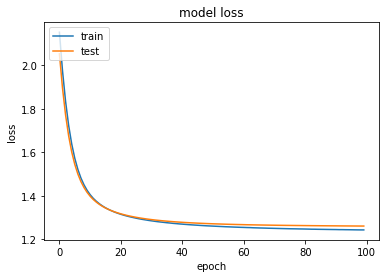

In [31]:
# summarize history for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

    ii. Training Accuracy and Validation Accuracy

<ipython-input-32-5a00ee743493>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


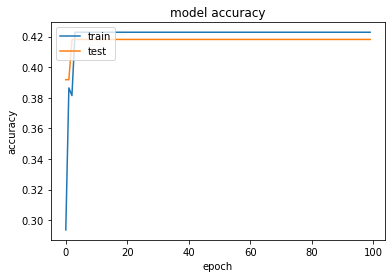

In [32]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## D. Design new architecture/update existing architecture in attempt to improve the performance of the model. 

In [33]:
# Design the NN
classifier = Sequential()

# Input Layer
classifier.add(Dense(activation = 'relu', input_dim = 11, units=9, kernel_initializer='he_normal'))

#Normalize the data
classifier.add(tf.keras.layers.BatchNormalization())

# Add dropout
classifier.add(Dropout(0.1))

# Add 1st hidden layer
classifier.add(Dense(9, activation='relu', kernel_initializer='he_normal'))

#Normalize the data
classifier.add(tf.keras.layers.BatchNormalization())

# Add dropout
classifier.add(Dropout(0.1))

# Add output layer
classifier.add(Dense(9, activation = 'softmax', kernel_initializer='uniform'))

# Compile the model
adam_optimizer = tf.keras.optimizers.Adam(lr=0.001)
classifier.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Network Summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 108       
_________________________________________________________________
batch_normalization (BatchNo (None, 9)                 36        
_________________________________________________________________
dropout (Dropout)            (None, 9)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 9)                 36        
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 9)                

In [34]:
training = classifier.fit(X_train_scaled, dummy_y_train, 
               validation_data=(X_test_scaled,dummy_y_test), 
               epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 2.1829 - accuracy: 0.2233 - val_loss: 2.1623 - val_accuracy: 0.4298
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 2.1223 - accuracy: 0.4361 - val_loss: 2.1228 - val_accuracy: 0.5322
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 2.0553 - accuracy: 0.4904 - val_loss: 2.0754 - val_accuracy: 0.5439
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 1.9874 - accuracy: 0.4987 - val_loss: 2.0148 - val_accuracy: 0.5673
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 1.8862 - accuracy: 0.5602 - val_loss: 1.9395 - val_accuracy: 0.5702
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 1.8010 - accuracy: 0.5596 - val_loss: 1.8448 - val_accuracy: 0.5936
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 1.7158 - accuracy: 0.5569 - val_loss: 1.7457 - val_accuracy: 0.6023
Epoch 8/100

Epoch 59/100
25/25 [==============================] - 0s 5ms/step - loss: 0.9556 - accuracy: 0.5712 - val_loss: 0.9849 - val_accuracy: 0.5936
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9576 - accuracy: 0.5910 - val_loss: 0.9883 - val_accuracy: 0.5965
Epoch 61/100
25/25 [==============================] - 0s 5ms/step - loss: 0.9623 - accuracy: 0.5717 - val_loss: 0.9890 - val_accuracy: 0.5906
Epoch 62/100
25/25 [==============================] - 0s 8ms/step - loss: 0.9573 - accuracy: 0.5796 - val_loss: 0.9852 - val_accuracy: 0.5906
Epoch 63/100
25/25 [==============================] - 0s 7ms/step - loss: 0.9730 - accuracy: 0.5480 - val_loss: 0.9881 - val_accuracy: 0.5819
Epoch 64/100
25/25 [==============================] - 0s 7ms/step - loss: 0.9414 - accuracy: 0.6030 - val_loss: 0.9862 - val_accuracy: 0.5760
Epoch 65/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9521 - accuracy: 0.5614 - val_loss: 0.9825 - val_accuracy: 0.5906
Epoch 

## E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

<ipython-input-35-e15c834d1442>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


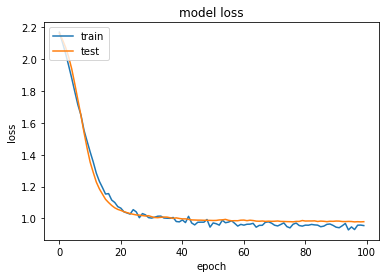

In [35]:
# summarize history for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<ipython-input-36-5a00ee743493>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


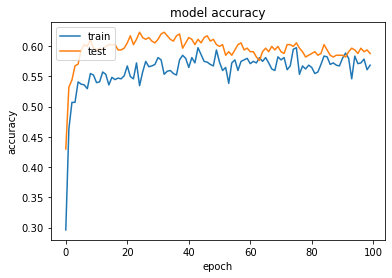

In [36]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## PART B• 
### DOMAIN: Autonomous Vehicles
### • CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map 
### making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions 
### of geo-located 360-degree panoramic images. 
### The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a 
### known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising 
### numbers in photographs is a problem of interest to the optical character recognition community. 
### While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is 
### still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large 
### range of fonts, colours, styles, orientations, and character arrangements. 
### The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as 
### by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around 
### a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, 
### it is more complex than MNIST because of the distractors.
### • DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the 
### minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and 
### numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
### Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
### The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
### Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised 
### Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
### http://ufldl.stanford.edu/housenumbers as the URL for this site

In [37]:

import h5py


AV_SVHN = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

AV_SVHN

<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>

## B. Print all the keys from the .h5 file.

In [38]:

AV_SVHN.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## C. Split the data into X_train, X_test, Y_train, Y_test

In [39]:

X_train = AV_SVHN['X_train'][:]
y_train = AV_SVHN['y_train'][:]
X_test = AV_SVHN['X_test'][:]
y_test = AV_SVHN['y_test'][:]

y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

# 2. Data Visualisation and preprocessing
## A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 

In [40]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42000, 32, 32) (42000,)
(18000, 32, 32) (18000,)


## B. Visualise first 10 images in train data and print its corresponding labels. 

<ipython-input-41-445d1f523bfb>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


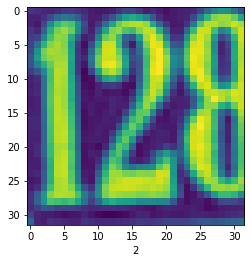

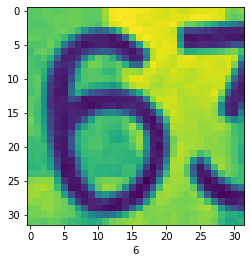

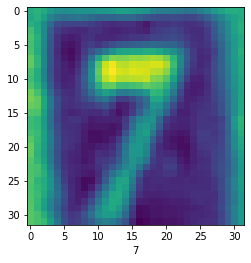

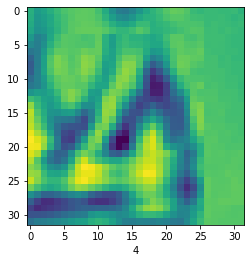

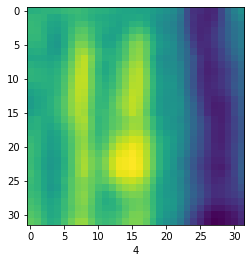

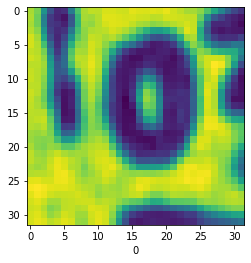

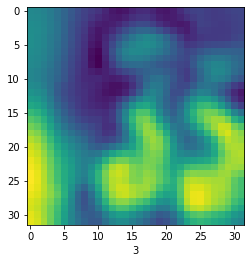

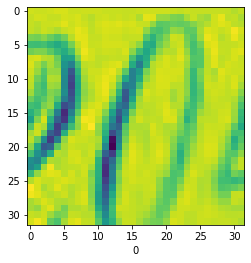

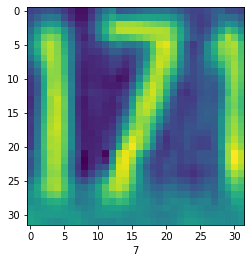

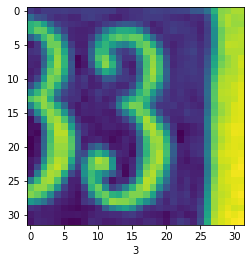

In [41]:
for i in range(10):
    image = X_train[i]
    plt.figure(i)
    plt.imshow(image)
    plt.xlabel(y_train[i])
    plt.show()

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


<ipython-input-42-d985bd56aa84>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


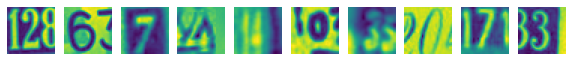

In [42]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## C. Reshape all the images with appropriate shape update the data in same variable.

In [43]:


print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [44]:
# Reshaping the dataset to flatten them. Reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [45]:
# Check Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (1024,)

First image:
 [33.0704 30.2601 26.852  ... 49.6682 50.853  53.0377]


In [46]:
print("X_train",X_train.shape," X_test", X_test.shape, 'y_train',y_train.shape, 'y_test',y_test.shape)

X_train (42000, 1024)  X_test (18000, 1024) y_train (42000,) y_test (18000,)


## D. Normalise the images i.e. Normalise the pixel values.

In [47]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

Max value in X_train: 0.9999
Min value in X_train: 0.0


## E. Transform Labels into format acceptable by Neural Network

In [48]:
# one hot encode output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(42000, 10)
(18000, 10)


## F. Print total Number of classes in the Dataset. 

In [49]:
print("Number of classes in y_train:", y_train.shape[1])
print("Number of classes in y_test:", y_test.shape[1])

Number of classes in y_train: 10
Number of classes in y_test: 10


# 3. Model Training & Evaluation using Neural Network

## A. Design a Neural Network to train a classifier.

In [50]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(1024, )),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation = 'softmax')             
    ]) 
    
    #declare adam optimizer with learning rate of 0.0005 
    adam = optimizers.Adam(learning_rate=0.0005)
    
    #compile the model
    model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics= ['accuracy'])
    
    return model

# Build the model
model_2 = nn_model_2()
#Print the model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)               

## B. Train the classifier using previously designed Architecture (Use best suitable parameters).

In [51]:
# Fit the model
history_model_2 = model_2.fit(X_train,y_train, epochs=30, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/30
263/263 [==============================] - 3s 10ms/step - loss: 2.4033 - accuracy: 0.1021 - val_loss: 2.3047 - val_accuracy: 0.1052
Epoch 2/30
263/263 [==============================] - 2s 7ms/step - loss: 2.2890 - accuracy: 0.1189 - val_loss: 2.1596 - val_accuracy: 0.2277
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 1.8858 - accuracy: 0.3172 - val_loss: 1.5831 - val_accuracy: 0.4518
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.4916 - accuracy: 0.4929 - val_loss: 1.2670 - val_accuracy: 0.5869
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 1.2837 - accuracy: 0.5770 - val_loss: 1.2077 - val_accuracy: 0.6048
Epoch 6/30
263/263 [==============================] - 2s 8ms/step - loss: 1.1842 - accuracy: 0.6167 - val_loss: 1.1311 - val_accuracy: 0.6400
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 1.1063 - accuracy: 0.6433 - val_loss: 1.0468 - val_accuracy: 0.6690
Ep

## C. Evaluate performance of the model with appropriate metrics.

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1814
           1       0.68      0.88      0.77      1828
           2       0.83      0.79      0.81      1803
           3       0.82      0.69      0.75      1719
           4       0.84      0.83      0.84      1812
           5       0.78      0.77      0.77      1768
           6       0.83      0.76      0.79      1832
           7       0.83      0.81      0.82      1808
           8       0.80      0.68      0.74      1812
           9       0.77      0.76      0.76      1804

    accuracy                           0.78     18000
   macro avg       0.79      0.78      0.78     18000
weighted avg       0.79      0.78      0.78     18000



<ipython-input-52-f120ccadb8d4>:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


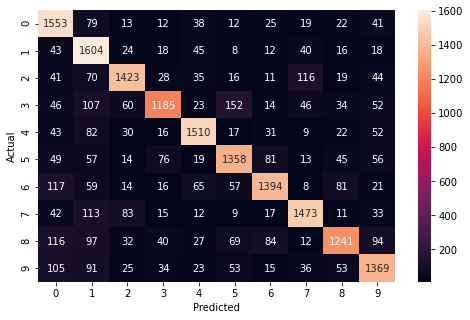

In [52]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

<ipython-input-53-62949c5b5cc2>:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


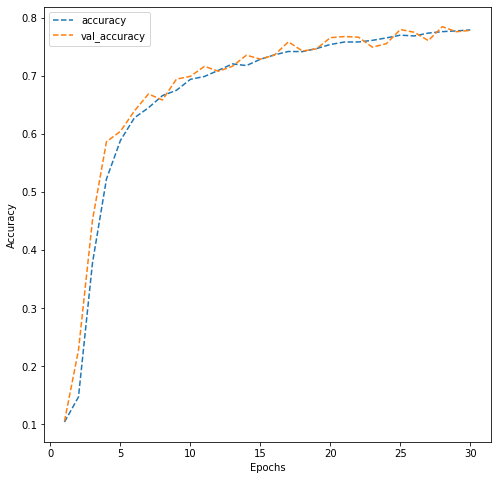

In [53]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<ipython-input-54-c903909191e5>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


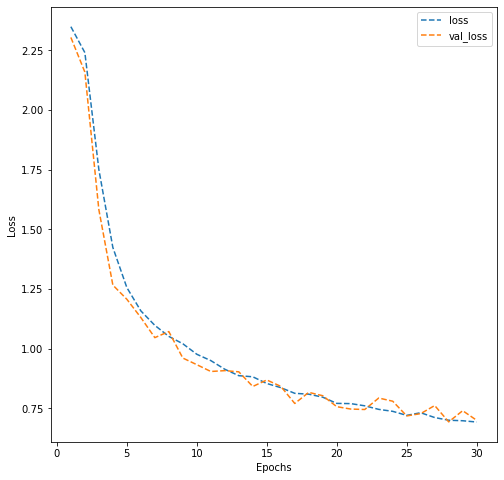

In [54]:
dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['loss'],ls = '--', label = 'loss')
plt.plot(list_ep,dict_hist['val_loss'],ls = '--', label = 'val_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()